# 순환 신경망 - 나비야
#### 출처: [순환 신경망 모델 만들어보기](https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/)

## 기본 LSTM 모델
- 128 메모리 셀을 가진 LSTM 레이어 1개와 Dense 레이어로 구성
- 입력은 샘플이 50개, 타임스텝이 4개, 속성이 1개로 구성
- 상태유지(stateful) 모드 비활성화

In [1]:
# 사용할 패키지 불러오기
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

In [2]:
# 랜덤시드 고정시키기
np.random.seed(5)

In [3]:
# 데이터셋 생성 함수        
def seq2dataset(seq, window_size):
    dataset = []
    for i in range(len(seq)-window_size):
        subset = seq[i:(i+window_size+1)]
        dataset.append([code2idx[item] for item in subset])
    return np.array(dataset)

In [4]:
# 데이터 준비하기

# 코드 사전 정의
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}
idx2code = {0:'c4', 1:'d4', 2:'e4', 3:'f4', 4:'g4', 5:'a4', 6:'b4',
            7:'c8', 8:'d8', 9:'e8', 10:'f8', 11:'g8', 12:'a8', 13:'b8'}

In [5]:
# 시퀀스 데이터 정의
seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [6]:
# 데이터셋 생성하기
dataset = seq2dataset(seq, window_size = 4)
dataset.shape

(50, 5)

In [7]:
# 입력(X)과 출력(Y) 변수로 분리하기
x_train = dataset[:,0:4]
y_train = dataset[:,4]

MAX_IDX_VALUE = 13

In [8]:
# 입력값 정규화 시키기
x_train = x_train / float(MAX_IDX_VALUE)
x_train.shape

(50, 4)

In [9]:
# 입력을 (샘플 수, 타입스텝, 특성 수)로 형태 변환
x_train = np.reshape(x_train, (50, 4, 1))

In [10]:
# 라벨값에 대한 one-hot 인코딩 수행
y_train = to_categorical(y_train)
one_hot_vec_size = y_train.shape[1]
one_hot_vec_size

12

In [11]:
# 모델 구성하기
model = Sequential()
model.add(LSTM(128, input_shape = (4, 1)))
model.add(Dense(one_hot_vec_size, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense (Dense)                (None, 12)                1548      
Total params: 68,108
Trainable params: 68,108
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 모델 학습시키기
history = model.fit(x_train, y_train, epochs=2000, batch_size=14, verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50 samples
Epoch 1/2000
50/50 - 1s - loss: 2.4833 - acc: 0.0400
Epoch 2/2000
50/50 - 0s - loss: 2.4433 - acc: 0.3200
Epoch 3/2000
50/50 - 0s - loss: 2.4034 - acc: 0.3400
Epoch 4/2000
50/50 - 0s - loss: 2.3598 - acc: 0.3400
Epoch 5/2000
50/50 - 0s - loss: 2.3092 - acc: 0.3400
Epoch 6/2000
50/50 - 0s - loss: 2.2470 - acc: 0.3400
Epoch 7/2000
50/50 - 0s - loss: 2.1736 - acc: 0.3400
Epoch 8/2000
50/50 - 0s - loss: 2.0938 - acc: 0.3400
Epoch 9/2000
50/50 - 0s - loss: 2.0172 - acc: 0.3400
Epoch 10/2000
50/50 - 0s - loss: 1.9644 - acc: 0.3400
Epoch 11/2000
50/50 - 0s - loss: 1.9725 - acc: 0.3400
Epoch 12/2000
50/50 - 0s - loss: 1.9636 - acc: 0.3400
Epoch 13/2000
50/50 - 0s - loss: 1.9352 - acc: 0.3400
Epoch 14/2000
50/50 - 0s - loss: 1.9234 - acc: 0.3400
Epoch 15/2000
50/50 - 0s - loss: 1.9222 - acc: 0.3400
Epoch 16/2000
50/50 - 0s - loss: 1.9169 - acc: 0.3400
Epoch 17/2000
50/50 - 0s - loss

Epoch 146/2000
50/50 - 0s - loss: 1.6194 - acc: 0.3600
Epoch 147/2000
50/50 - 0s - loss: 1.6275 - acc: 0.4200
Epoch 148/2000
50/50 - 0s - loss: 1.6200 - acc: 0.4400
Epoch 149/2000
50/50 - 0s - loss: 1.6179 - acc: 0.4400
Epoch 150/2000
50/50 - 0s - loss: 1.6103 - acc: 0.4400
Epoch 151/2000
50/50 - 0s - loss: 1.6209 - acc: 0.4200
Epoch 152/2000
50/50 - 0s - loss: 1.6075 - acc: 0.4200
Epoch 153/2000
50/50 - 0s - loss: 1.6164 - acc: 0.4600
Epoch 154/2000
50/50 - 0s - loss: 1.6047 - acc: 0.4400
Epoch 155/2000
50/50 - 0s - loss: 1.6122 - acc: 0.3800
Epoch 156/2000
50/50 - 0s - loss: 1.6005 - acc: 0.4200
Epoch 157/2000
50/50 - 0s - loss: 1.6096 - acc: 0.4000
Epoch 158/2000
50/50 - 0s - loss: 1.5941 - acc: 0.4200
Epoch 159/2000
50/50 - 0s - loss: 1.5852 - acc: 0.4400
Epoch 160/2000
50/50 - 0s - loss: 1.5818 - acc: 0.4400
Epoch 161/2000
50/50 - 0s - loss: 1.5847 - acc: 0.4400
Epoch 162/2000
50/50 - 0s - loss: 1.5827 - acc: 0.4400
Epoch 163/2000
50/50 - 0s - loss: 1.5935 - acc: 0.4400
Epoch 164/

Epoch 295/2000
50/50 - 0s - loss: 1.3142 - acc: 0.5000
Epoch 296/2000
50/50 - 0s - loss: 1.3333 - acc: 0.5400
Epoch 297/2000
50/50 - 0s - loss: 1.3094 - acc: 0.5600
Epoch 298/2000
50/50 - 0s - loss: 1.3004 - acc: 0.5600
Epoch 299/2000
50/50 - 0s - loss: 1.2885 - acc: 0.5600
Epoch 300/2000
50/50 - 0s - loss: 1.2976 - acc: 0.5000
Epoch 301/2000
50/50 - 0s - loss: 1.3393 - acc: 0.4600
Epoch 302/2000
50/50 - 0s - loss: 1.3131 - acc: 0.4800
Epoch 303/2000
50/50 - 0s - loss: 1.3126 - acc: 0.5200
Epoch 304/2000
50/50 - 0s - loss: 1.3134 - acc: 0.5000
Epoch 305/2000
50/50 - 0s - loss: 1.2804 - acc: 0.5800
Epoch 306/2000
50/50 - 0s - loss: 1.3104 - acc: 0.4800
Epoch 307/2000
50/50 - 0s - loss: 1.3090 - acc: 0.4800
Epoch 308/2000
50/50 - 0s - loss: 1.2828 - acc: 0.5800
Epoch 309/2000
50/50 - 0s - loss: 1.2719 - acc: 0.5600
Epoch 310/2000
50/50 - 0s - loss: 1.2945 - acc: 0.5000
Epoch 311/2000
50/50 - 0s - loss: 1.2778 - acc: 0.5400
Epoch 312/2000
50/50 - 0s - loss: 1.2652 - acc: 0.6000
Epoch 313/

Epoch 444/2000
50/50 - 0s - loss: 1.0248 - acc: 0.6400
Epoch 445/2000
50/50 - 0s - loss: 1.0606 - acc: 0.6000
Epoch 446/2000
50/50 - 0s - loss: 1.0100 - acc: 0.6000
Epoch 447/2000
50/50 - 0s - loss: 1.0559 - acc: 0.6200
Epoch 448/2000
50/50 - 0s - loss: 1.0194 - acc: 0.6400
Epoch 449/2000
50/50 - 0s - loss: 1.0186 - acc: 0.6200
Epoch 450/2000
50/50 - 0s - loss: 1.0051 - acc: 0.6400
Epoch 451/2000
50/50 - 0s - loss: 1.0002 - acc: 0.6200
Epoch 452/2000
50/50 - 0s - loss: 1.0184 - acc: 0.6000
Epoch 453/2000
50/50 - 0s - loss: 0.9989 - acc: 0.6000
Epoch 454/2000
50/50 - 0s - loss: 1.0079 - acc: 0.6400
Epoch 455/2000
50/50 - 0s - loss: 1.0023 - acc: 0.6400
Epoch 456/2000
50/50 - 0s - loss: 1.0052 - acc: 0.6400
Epoch 457/2000
50/50 - 0s - loss: 0.9964 - acc: 0.6000
Epoch 458/2000
50/50 - 0s - loss: 1.0010 - acc: 0.6400
Epoch 459/2000
50/50 - 0s - loss: 0.9958 - acc: 0.6000
Epoch 460/2000
50/50 - 0s - loss: 1.0006 - acc: 0.6400
Epoch 461/2000
50/50 - 0s - loss: 0.9755 - acc: 0.6000
Epoch 462/

Epoch 593/2000
50/50 - 0s - loss: 0.7318 - acc: 0.7200
Epoch 594/2000
50/50 - 0s - loss: 0.7292 - acc: 0.7000
Epoch 595/2000
50/50 - 0s - loss: 0.7363 - acc: 0.6800
Epoch 596/2000
50/50 - 0s - loss: 0.7055 - acc: 0.7000
Epoch 597/2000
50/50 - 0s - loss: 0.7375 - acc: 0.6600
Epoch 598/2000
50/50 - 0s - loss: 0.7276 - acc: 0.7400
Epoch 599/2000
50/50 - 0s - loss: 0.7207 - acc: 0.7400
Epoch 600/2000
50/50 - 0s - loss: 0.7306 - acc: 0.7200
Epoch 601/2000
50/50 - 0s - loss: 0.7215 - acc: 0.6800
Epoch 602/2000
50/50 - 0s - loss: 0.7115 - acc: 0.7200
Epoch 603/2000
50/50 - 0s - loss: 0.7100 - acc: 0.7400
Epoch 604/2000
50/50 - 0s - loss: 0.6976 - acc: 0.7400
Epoch 605/2000
50/50 - 0s - loss: 0.7077 - acc: 0.6800
Epoch 606/2000
50/50 - 0s - loss: 0.7091 - acc: 0.6800
Epoch 607/2000
50/50 - 0s - loss: 0.7192 - acc: 0.7600
Epoch 608/2000
50/50 - 0s - loss: 0.7181 - acc: 0.7200
Epoch 609/2000
50/50 - 0s - loss: 0.7048 - acc: 0.6800
Epoch 610/2000
50/50 - 0s - loss: 0.7024 - acc: 0.7200
Epoch 611/

Epoch 742/2000
50/50 - 0s - loss: 0.5480 - acc: 0.8200
Epoch 743/2000
50/50 - 0s - loss: 0.5388 - acc: 0.8400
Epoch 744/2000
50/50 - 0s - loss: 0.5430 - acc: 0.8200
Epoch 745/2000
50/50 - 0s - loss: 0.5447 - acc: 0.8200
Epoch 746/2000
50/50 - 0s - loss: 0.5410 - acc: 0.7800
Epoch 747/2000
50/50 - 0s - loss: 0.5425 - acc: 0.8000
Epoch 748/2000
50/50 - 0s - loss: 0.5538 - acc: 0.8000
Epoch 749/2000
50/50 - 0s - loss: 0.5311 - acc: 0.8000
Epoch 750/2000
50/50 - 0s - loss: 0.5599 - acc: 0.8400
Epoch 751/2000
50/50 - 0s - loss: 0.5344 - acc: 0.8200
Epoch 752/2000
50/50 - 0s - loss: 0.5370 - acc: 0.8000
Epoch 753/2000
50/50 - 0s - loss: 0.5315 - acc: 0.8200
Epoch 754/2000
50/50 - 0s - loss: 0.5327 - acc: 0.8400
Epoch 755/2000
50/50 - 0s - loss: 0.5334 - acc: 0.8600
Epoch 756/2000
50/50 - 0s - loss: 0.5295 - acc: 0.8200
Epoch 757/2000
50/50 - 0s - loss: 0.5422 - acc: 0.8200
Epoch 758/2000
50/50 - 0s - loss: 0.5545 - acc: 0.8200
Epoch 759/2000
50/50 - 0s - loss: 0.5911 - acc: 0.7800
Epoch 760/

Epoch 891/2000
50/50 - 0s - loss: 0.4580 - acc: 0.8600
Epoch 892/2000
50/50 - 0s - loss: 0.4660 - acc: 0.8200
Epoch 893/2000
50/50 - 0s - loss: 0.4634 - acc: 0.8400
Epoch 894/2000
50/50 - 0s - loss: 0.4687 - acc: 0.8200
Epoch 895/2000
50/50 - 0s - loss: 0.4516 - acc: 0.8400
Epoch 896/2000
50/50 - 0s - loss: 0.4765 - acc: 0.8000
Epoch 897/2000
50/50 - 0s - loss: 0.5306 - acc: 0.8000
Epoch 898/2000
50/50 - 0s - loss: 0.4826 - acc: 0.8200
Epoch 899/2000
50/50 - 0s - loss: 0.4839 - acc: 0.8200
Epoch 900/2000
50/50 - 0s - loss: 0.5155 - acc: 0.7800
Epoch 901/2000
50/50 - 0s - loss: 0.5245 - acc: 0.7800
Epoch 902/2000
50/50 - 0s - loss: 0.4375 - acc: 0.8800
Epoch 903/2000
50/50 - 0s - loss: 0.5690 - acc: 0.7800
Epoch 904/2000
50/50 - 0s - loss: 0.4841 - acc: 0.8200
Epoch 905/2000
50/50 - 0s - loss: 0.4652 - acc: 0.8400
Epoch 906/2000
50/50 - 0s - loss: 0.4546 - acc: 0.8200
Epoch 907/2000
50/50 - 0s - loss: 0.4664 - acc: 0.8400
Epoch 908/2000
50/50 - 0s - loss: 0.4565 - acc: 0.8600
Epoch 909/

50/50 - 0s - loss: 0.4002 - acc: 0.8600
Epoch 1040/2000
50/50 - 0s - loss: 0.3953 - acc: 0.8600
Epoch 1041/2000
50/50 - 0s - loss: 0.4148 - acc: 0.8400
Epoch 1042/2000
50/50 - 0s - loss: 0.3976 - acc: 0.8600
Epoch 1043/2000
50/50 - 0s - loss: 0.4085 - acc: 0.8400
Epoch 1044/2000
50/50 - 0s - loss: 0.4197 - acc: 0.8400
Epoch 1045/2000
50/50 - 0s - loss: 0.4071 - acc: 0.8600
Epoch 1046/2000
50/50 - 0s - loss: 0.4090 - acc: 0.8600
Epoch 1047/2000
50/50 - 0s - loss: 0.4074 - acc: 0.8600
Epoch 1048/2000
50/50 - 0s - loss: 0.4323 - acc: 0.8400
Epoch 1049/2000
50/50 - 0s - loss: 0.4273 - acc: 0.8200
Epoch 1050/2000
50/50 - 0s - loss: 0.5114 - acc: 0.8200
Epoch 1051/2000
50/50 - 0s - loss: 0.4291 - acc: 0.8200
Epoch 1052/2000
50/50 - 0s - loss: 0.4347 - acc: 0.8200
Epoch 1053/2000
50/50 - 0s - loss: 0.4136 - acc: 0.8200
Epoch 1054/2000
50/50 - 0s - loss: 0.4051 - acc: 0.8200
Epoch 1055/2000
50/50 - 0s - loss: 0.4570 - acc: 0.8200
Epoch 1056/2000
50/50 - 0s - loss: 0.4355 - acc: 0.8600
Epoch 10

Epoch 1186/2000
50/50 - 0s - loss: 0.3702 - acc: 0.8600
Epoch 1187/2000
50/50 - 0s - loss: 0.3533 - acc: 0.8600
Epoch 1188/2000
50/50 - 0s - loss: 0.3541 - acc: 0.8600
Epoch 1189/2000
50/50 - 0s - loss: 0.3702 - acc: 0.8600
Epoch 1190/2000
50/50 - 0s - loss: 0.3743 - acc: 0.8400
Epoch 1191/2000
50/50 - 0s - loss: 0.3621 - acc: 0.8600
Epoch 1192/2000
50/50 - 0s - loss: 0.3611 - acc: 0.8600
Epoch 1193/2000
50/50 - 0s - loss: 0.3712 - acc: 0.8400
Epoch 1194/2000
50/50 - 0s - loss: 0.3675 - acc: 0.8600
Epoch 1195/2000
50/50 - 0s - loss: 0.3617 - acc: 0.8400
Epoch 1196/2000
50/50 - 0s - loss: 0.3643 - acc: 0.8600
Epoch 1197/2000
50/50 - 0s - loss: 0.3677 - acc: 0.8600
Epoch 1198/2000
50/50 - 0s - loss: 0.3619 - acc: 0.8600
Epoch 1199/2000
50/50 - 0s - loss: 0.3566 - acc: 0.8800
Epoch 1200/2000
50/50 - 0s - loss: 0.3577 - acc: 0.8800
Epoch 1201/2000
50/50 - 0s - loss: 0.3724 - acc: 0.8800
Epoch 1202/2000
50/50 - 0s - loss: 0.3838 - acc: 0.8800
Epoch 1203/2000
50/50 - 0s - loss: 0.3621 - acc:

Epoch 1333/2000
50/50 - 0s - loss: 0.3358 - acc: 0.8800
Epoch 1334/2000
50/50 - 0s - loss: 0.3680 - acc: 0.8600
Epoch 1335/2000
50/50 - 0s - loss: 0.3308 - acc: 0.8800
Epoch 1336/2000
50/50 - 0s - loss: 0.3528 - acc: 0.8800
Epoch 1337/2000
50/50 - 0s - loss: 0.3513 - acc: 0.8600
Epoch 1338/2000
50/50 - 0s - loss: 0.3546 - acc: 0.8800
Epoch 1339/2000
50/50 - 0s - loss: 0.3674 - acc: 0.8200
Epoch 1340/2000
50/50 - 0s - loss: 0.3609 - acc: 0.8600
Epoch 1341/2000
50/50 - 0s - loss: 0.3470 - acc: 0.8600
Epoch 1342/2000
50/50 - 0s - loss: 0.3388 - acc: 0.8400
Epoch 1343/2000
50/50 - 0s - loss: 0.3643 - acc: 0.8400
Epoch 1344/2000
50/50 - 0s - loss: 0.3474 - acc: 0.8400
Epoch 1345/2000
50/50 - 0s - loss: 0.3352 - acc: 0.8600
Epoch 1346/2000
50/50 - 0s - loss: 0.3283 - acc: 0.8600
Epoch 1347/2000
50/50 - 0s - loss: 0.3410 - acc: 0.8400
Epoch 1348/2000
50/50 - 0s - loss: 0.3484 - acc: 0.8400
Epoch 1349/2000
50/50 - 0s - loss: 0.3425 - acc: 0.8600
Epoch 1350/2000
50/50 - 0s - loss: 0.3388 - acc:

Epoch 1480/2000
50/50 - 0s - loss: 0.3145 - acc: 0.9000
Epoch 1481/2000
50/50 - 0s - loss: 0.3172 - acc: 0.8800
Epoch 1482/2000
50/50 - 0s - loss: 0.3077 - acc: 0.8800
Epoch 1483/2000
50/50 - 0s - loss: 0.3358 - acc: 0.8600
Epoch 1484/2000
50/50 - 0s - loss: 0.3215 - acc: 0.8600
Epoch 1485/2000
50/50 - 0s - loss: 0.3509 - acc: 0.8600
Epoch 1486/2000
50/50 - 0s - loss: 0.3252 - acc: 0.8600
Epoch 1487/2000
50/50 - 0s - loss: 0.3492 - acc: 0.8400
Epoch 1488/2000
50/50 - 0s - loss: 0.3177 - acc: 0.8800
Epoch 1489/2000
50/50 - 0s - loss: 0.3244 - acc: 0.8600
Epoch 1490/2000
50/50 - 0s - loss: 0.3201 - acc: 0.8600
Epoch 1491/2000
50/50 - 0s - loss: 0.3212 - acc: 0.8800
Epoch 1492/2000
50/50 - 0s - loss: 0.3289 - acc: 0.8600
Epoch 1493/2000
50/50 - 0s - loss: 0.3199 - acc: 0.8800
Epoch 1494/2000
50/50 - 0s - loss: 0.3249 - acc: 0.8400
Epoch 1495/2000
50/50 - 0s - loss: 0.3072 - acc: 0.8600
Epoch 1496/2000
50/50 - 0s - loss: 0.3205 - acc: 0.8400
Epoch 1497/2000
50/50 - 0s - loss: 0.3117 - acc:

Epoch 1627/2000
50/50 - 0s - loss: 0.3119 - acc: 0.8400
Epoch 1628/2000
50/50 - 0s - loss: 0.2963 - acc: 0.8800
Epoch 1629/2000
50/50 - 0s - loss: 0.3067 - acc: 0.8600
Epoch 1630/2000
50/50 - 0s - loss: 0.2927 - acc: 0.8800
Epoch 1631/2000
50/50 - 0s - loss: 0.3080 - acc: 0.8400
Epoch 1632/2000
50/50 - 0s - loss: 0.3163 - acc: 0.8600
Epoch 1633/2000
50/50 - 0s - loss: 0.3784 - acc: 0.8600
Epoch 1634/2000
50/50 - 0s - loss: 0.3325 - acc: 0.9000
Epoch 1635/2000
50/50 - 0s - loss: 0.3205 - acc: 0.8800
Epoch 1636/2000
50/50 - 0s - loss: 0.3293 - acc: 0.9000
Epoch 1637/2000
50/50 - 0s - loss: 0.3257 - acc: 0.8800
Epoch 1638/2000
50/50 - 0s - loss: 0.3327 - acc: 0.8600
Epoch 1639/2000
50/50 - 0s - loss: 0.2956 - acc: 0.8600
Epoch 1640/2000
50/50 - 0s - loss: 0.3321 - acc: 0.8600
Epoch 1641/2000
50/50 - 0s - loss: 0.2872 - acc: 0.8600
Epoch 1642/2000
50/50 - 0s - loss: 0.3416 - acc: 0.8400
Epoch 1643/2000
50/50 - 0s - loss: 0.3125 - acc: 0.8800
Epoch 1644/2000
50/50 - 0s - loss: 0.3997 - acc:

Epoch 1774/2000
50/50 - 0s - loss: 0.2910 - acc: 0.8600
Epoch 1775/2000
50/50 - 0s - loss: 0.2892 - acc: 0.8600
Epoch 1776/2000
50/50 - 0s - loss: 0.3055 - acc: 0.8400
Epoch 1777/2000
50/50 - 0s - loss: 0.2830 - acc: 0.8800
Epoch 1778/2000
50/50 - 0s - loss: 0.2877 - acc: 0.8800
Epoch 1779/2000
50/50 - 0s - loss: 0.2913 - acc: 0.8600
Epoch 1780/2000
50/50 - 0s - loss: 0.2955 - acc: 0.8400
Epoch 1781/2000
50/50 - 0s - loss: 0.2876 - acc: 0.8600
Epoch 1782/2000
50/50 - 0s - loss: 0.2912 - acc: 0.9000
Epoch 1783/2000
50/50 - 0s - loss: 0.2823 - acc: 0.8800
Epoch 1784/2000
50/50 - 0s - loss: 0.3017 - acc: 0.8600
Epoch 1785/2000
50/50 - 0s - loss: 0.2830 - acc: 0.8800
Epoch 1786/2000
50/50 - 0s - loss: 0.2923 - acc: 0.8800
Epoch 1787/2000
50/50 - 0s - loss: 0.2911 - acc: 0.8600
Epoch 1788/2000
50/50 - 0s - loss: 0.2876 - acc: 0.8600
Epoch 1789/2000
50/50 - 0s - loss: 0.2852 - acc: 0.8800
Epoch 1790/2000
50/50 - 0s - loss: 0.2916 - acc: 0.8800
Epoch 1791/2000
50/50 - 0s - loss: 0.2781 - acc:

Epoch 1921/2000
50/50 - 0s - loss: 0.2710 - acc: 0.9000
Epoch 1922/2000
50/50 - 0s - loss: 0.2832 - acc: 0.8600
Epoch 1923/2000
50/50 - 0s - loss: 0.2714 - acc: 0.8800
Epoch 1924/2000
50/50 - 0s - loss: 0.2826 - acc: 0.8600
Epoch 1925/2000
50/50 - 0s - loss: 0.2851 - acc: 0.8600
Epoch 1926/2000
50/50 - 0s - loss: 0.2737 - acc: 0.8600
Epoch 1927/2000
50/50 - 0s - loss: 0.2747 - acc: 0.8600
Epoch 1928/2000
50/50 - 0s - loss: 0.2807 - acc: 0.8400
Epoch 1929/2000
50/50 - 0s - loss: 0.2763 - acc: 0.8600
Epoch 1930/2000
50/50 - 0s - loss: 0.2748 - acc: 0.8800
Epoch 1931/2000
50/50 - 0s - loss: 0.2752 - acc: 0.9000
Epoch 1932/2000
50/50 - 0s - loss: 0.2810 - acc: 0.9000
Epoch 1933/2000
50/50 - 0s - loss: 0.2823 - acc: 0.8800
Epoch 1934/2000
50/50 - 0s - loss: 0.2705 - acc: 0.8800
Epoch 1935/2000
50/50 - 0s - loss: 0.2752 - acc: 0.8800
Epoch 1936/2000
50/50 - 0s - loss: 0.2956 - acc: 0.8600
Epoch 1937/2000
50/50 - 0s - loss: 0.2773 - acc: 0.9000
Epoch 1938/2000
50/50 - 0s - loss: 0.2785 - acc:

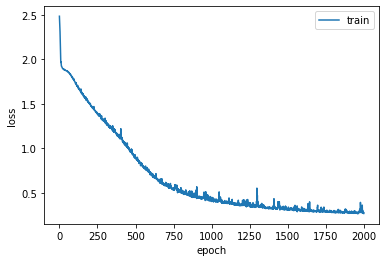

In [15]:
# 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [16]:
# 모델 평가하기
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

50/50 [==============================] - 0s 2ms/sample - loss: 0.2673 - acc: 0.9000
acc: 90.00%


In [17]:
# 모델 사용하기
pred_count = 50   # 최대 예측 개수 정의

In [18]:
# 한 스텝 예측
seq_out = ['g8', 'e8', 'e4', 'f8']
pred_out = model.predict(x_train)

for i in range(pred_count):
    idx = np.argmax(pred_out[i]) # one-hot 인코딩을 인덱스 값으로 변환
    seq_out.append(idx2code[idx]) # seq_out는 최종 악보이므로 인덱스 값을 코드로 변환하여 저장
    
print("one step prediction : ", seq_out)

one step prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'e8', 'f8', 'g8', 'g8', 'g4', 'g8', 'e8', 'e8', 'e8', 'f8', 'g4', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'g4', 'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']


#### [노래 듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_one_step_prediction.mp3)

In [19]:
# 곡 전체 예측
seq_in = ['g8', 'e8', 'e4', 'f8']
seq_out = seq_in
seq_in = [code2idx[it] / float(MAX_IDX_VALUE) for it in seq_in]  # 코드를 인덱스값으로 변환

for i in range(pred_count):
    sample_in = np.array(seq_in)
    sample_in = np.reshape(sample_in, (1, 4, 1))    # 샘플 수, 타입스텝 수, 속성 수
    pred_out = model.predict(sample_in)
    idx = np.argmax(pred_out)
    seq_out.append(idx2code[idx])
    seq_in.append(idx / float(MAX_IDX_VALUE))
    seq_in.pop(0)

print("full song prediction : ", seq_out)

full song prediction :  ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'd8']


#### [노래듣기](http://tykimos.github.io/warehouse/2017-4-9-Stateless_LSTM_full_song_prediction.mp3)